In [1]:
import pandas as pd
import numpy as np
# from tempfile import mkdtemp
# from joblib import Memory
# cachedir = mkdtemp()
# memory = Memory(verbose=5)

# Using the Diamonds dataset

In [2]:
df = pd.read_csv("C:/Users/Tazeem Khan/Downloads/diamonds.csv")

**Dataset Information** <br>
• carat: weight of the diamond (0.2–5.01); <br>
• cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal);<br>
• color: diamond colour, from J (worst) to D (best);<br>
• clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2,VS1, VVS2, VVS1, IF (best));<br>
• x: length in mm (0–10.74)<br>
• y: width in mm (0–58.9)<br>
• z: depth in mm (0–31.8)<br>
• depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43–79)<br>
• table: width of top of diamond relative to widest point (43–95)<br>

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,330,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,327,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,328,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,337,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,338,4.34,4.35,2.75


In [4]:
df = df.drop(['Unnamed: 0'],axis = 1)

# Handling Categorical Variables

In [5]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [6]:
for col in ['cut', 'color', 'clarity']:
    df[col] = df[col].astype('category')

In [7]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [8]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3934.801557,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.442321,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,327.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,952.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2403.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5327.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
df.describe(include=['category'])

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [10]:
for col in ['cut', 'color', 'clarity']:
  print(df[col].unique())

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Fair', 'Good', 'Ideal', 'Premium', 'Very Good']
['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']
['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2']


In [11]:
map_cut = {'Fair' : 1,'Good' : 2,'Very Good': 3,'Premium': 4,'Ideal': 5}
map_color = {'J' : 1,'I' : 2,'H': 3,'G': 4,'F': 5,'E': 6,'D': 7}
map_clarity = {'I1' : 1,'SI2' : 2,'SI1': 3,'VS2': 4,'VS1': 5,'VVS2': 6,'VVS1': 7,'IF': 8}

In [12]:
df['cut_encoded'] = df.cut.map(map_cut)
df['color_encoded'] = df.color.map(map_color)
df['clarity_encoded'] = df.clarity.map(map_clarity)

In [13]:
for col in ['cut_encoded', 'color_encoded', 'clarity_encoded']:
  print(df[col].unique())

[5, 4, 2, 3, 1]
Categories (5, int64): [1, 2, 5, 4, 3]
[6, 2, 1, 3, 5, 4, 7]
Categories (7, int64): [7, 6, 5, 4, 3, 2, 1]
[2, 3, 5, 4, 6, 7, 1, 8]
Categories (8, int64): [1, 8, 3, 2, 5, 4, 7, 6]


In [14]:
df.dtypes

carat               float64
cut                category
color              category
clarity            category
depth               float64
table               float64
price                 int64
x                   float64
y                   float64
z                   float64
cut_encoded        category
color_encoded      category
clarity_encoded    category
dtype: object

In [15]:
df.describe(include=['category'])

,cut,color,clarity,cut_encoded,color_encoded,clarity_encoded
count,53940,53940,53940,53940,53940,53940
unique,5,7,8,5,7,8
top,Ideal,G,SI1,5,4,3
freq,21551,11292,13065,21551,11292,13065


# Data Inspection

## Question 1.1 <br>
Plot a heatmap of the Pearson correlation matrix of the dataset columns. Report which features have the highest absolute correlation with the target variable. Incthe context of either dataset, describe what the correlation patterns suggest

In [16]:
import seaborn as sns

<AxesSubplot:>

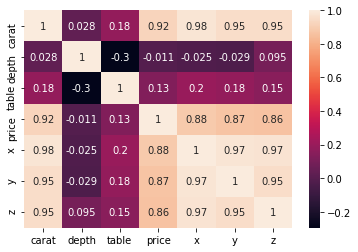

In [17]:
corr = df.corr()
sns.heatmap(corr,annot=True)

In [18]:
## Explain Correlations

## Question 1.2<br>
Plot the histogram of numerical features. What preprocessing can be done if the distribution of a feature has high skewness?

In [19]:
import matplotlib.pyplot as plt

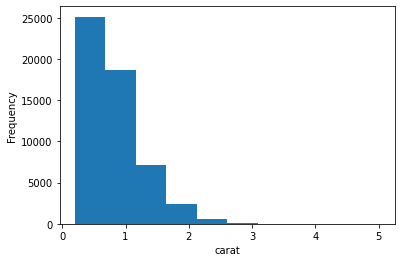

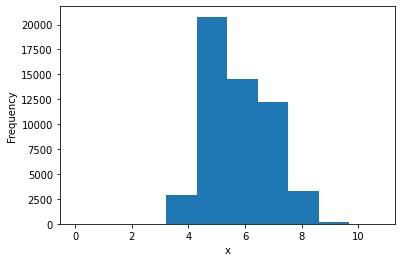

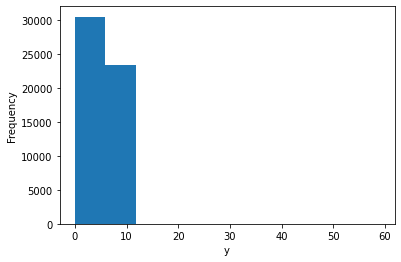

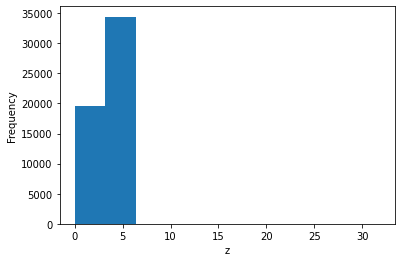

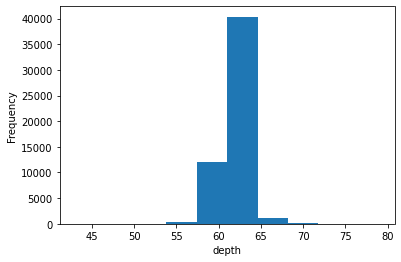

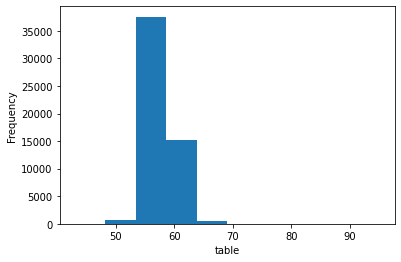

In [20]:
numerical_features = ['carat', 'x', 'y', 'z', 'depth', 'table'] 
for i in numerical_features:
    plt.hist(df[i])
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

## Question 1.3 <br>
Construct and inspect the box plot of categorical features vs target variable. What do you find?

In [21]:
df_og = pd.read_csv("C:/Users/Tazeem Khan/Downloads/diamonds.csv")

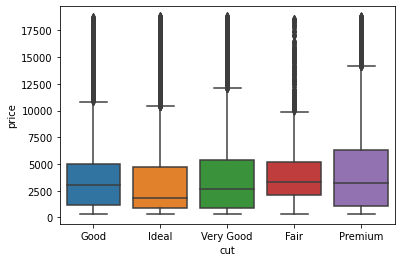

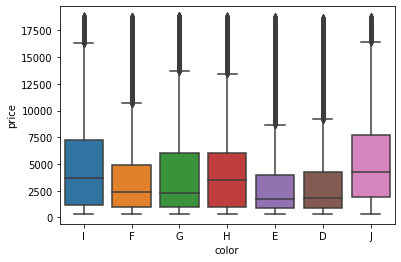

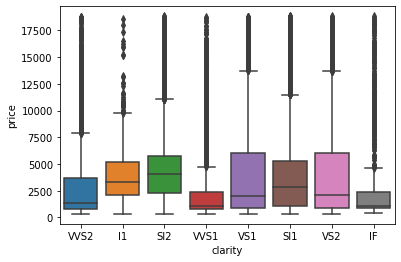

In [22]:
cat_list = ['cut','color','clarity']
for i in cat_list:
    sns.boxplot(x = df[i],y = df['price'],order=list(set(df[i])))
    plt.show()

## Question 1.4 <br>
For the Diamonds dataset, plot the counts by color, cut and clarity. 

<AxesSubplot:ylabel='cut'>

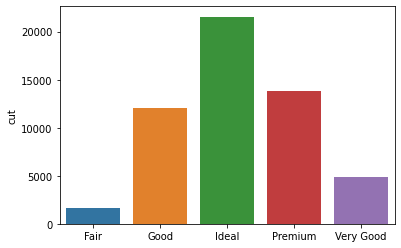

In [23]:
sns.barplot(x=df.cut.unique(),y=df['cut'].value_counts(),data=df)

<AxesSubplot:ylabel='color'>

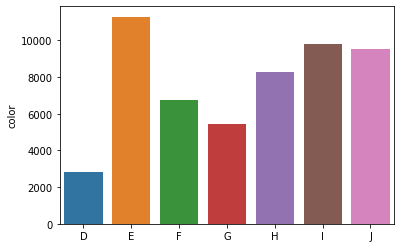

In [24]:
sns.barplot(x=df.color.unique(),y=df['color'].value_counts(),data=df)

<AxesSubplot:ylabel='clarity'>

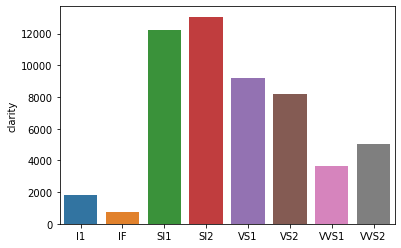

In [25]:
sns.barplot(x=df.clarity.unique(),y=df['clarity'].value_counts(),data=df)

# Standardization

## Question 2.1 <br>
Standardize feature columns and prepare them for training

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'cut_encoded', 'color_encoded', 'clarity_encoded'],
      dtype='object')

In [29]:
standardized_df = df[['price','carat', 'depth', 'table', 'x', 'y','z', 'cut_encoded', 'color_encoded', 'clarity_encoded']]

In [30]:
#numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

In [31]:
#numerical_df = df.select_dtypes(include=numerics)

In [32]:
standardized_df = scaler.fit_transform(standardized_df)

In [33]:
standardized_df = pd.DataFrame(standardized_df, columns =['std_price','carat', 'depth', 'table', 'x', 'y','z', 'cut_encoded', 'color_encoded', 'clarity_encoded'])

In [34]:
standardized_df

,std_price,carat,depth,table,x,y,z,cut_encoded,color_encoded,clarity_encoded
0,-0.903594,-1.198168,-0.174092,-1.099672,-1.587837,-1.536196,-1.571129,0.981473,0.937163,-1.245215
1,-0.904346,-1.240361,-1.360738,1.585529,-1.641325,-1.658774,-1.741175,0.085889,0.937163,-0.638095
2,-0.904095,-1.198168,-3.385019,3.375663,-1.498691,-1.457395,-1.741175,-1.705279,0.937163,0.576145
3,-0.901839,-1.071587,0.454133,0.242928,-1.364971,-1.317305,-1.287720,0.085889,-1.414272,-0.030975
4,-0.901588,-1.029394,1.082358,0.242928,-1.240167,-1.212238,-1.117674,-1.705279,-2.002131,-1.245215
...,...,...,...,...,...,...,...,...,...,...
53935,-0.294982,-0.164427,-0.662711,-0.204605,0.016798,0.022304,-0.054888,0.981473,1.525021,-0.638095
53936,-0.294731,-0.164427,0.942753,-1.099672,-0.036690,0.013548,0.100988,-1.705279,1.525021,-0.638095
53937,-0.294480,-0.206621,0.733344,1.137995,-0.063434,-0.047741,0.030135,-0.809695,1.525021,-0.638095
53938,-0.295232,0.130927,-0.523105,0.242928,0.373383,0.337506,0.285204,0.085889,-0.826413,-1.245215


In [35]:
standardized_df = pd.merge(df[['cut','color','clarity','price']],standardized_df,left_index=True, right_index=True)

In [36]:
standardized_df

,cut,color,clarity,price,std_price,carat,depth,table,x,y,z,cut_encoded,color_encoded,clarity_encoded
0,Ideal,E,SI2,330,-0.903594,-1.198168,-0.174092,-1.099672,-1.587837,-1.536196,-1.571129,0.981473,0.937163,-1.245215
1,Premium,E,SI1,327,-0.904346,-1.240361,-1.360738,1.585529,-1.641325,-1.658774,-1.741175,0.085889,0.937163,-0.638095
2,Good,E,VS1,328,-0.904095,-1.198168,-3.385019,3.375663,-1.498691,-1.457395,-1.741175,-1.705279,0.937163,0.576145
3,Premium,I,VS2,337,-0.901839,-1.071587,0.454133,0.242928,-1.364971,-1.317305,-1.287720,0.085889,-1.414272,-0.030975
4,Good,J,SI2,338,-0.901588,-1.029394,1.082358,0.242928,-1.240167,-1.212238,-1.117674,-1.705279,-2.002131,-1.245215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,Ideal,D,SI1,2758,-0.294982,-0.164427,-0.662711,-0.204605,0.016798,0.022304,-0.054888,0.981473,1.525021,-0.638095
53936,Good,D,SI1,2759,-0.294731,-0.164427,0.942753,-1.099672,-0.036690,0.013548,0.100988,-1.705279,1.525021,-0.638095
53937,Very Good,D,SI1,2760,-0.294480,-0.206621,0.733344,1.137995,-0.063434,-0.047741,0.030135,-0.809695,1.525021,-0.638095
53938,Premium,H,SI2,2757,-0.295232,0.130927,-0.523105,0.242928,0.373383,0.337506,0.285204,0.085889,-0.826413,-1.245215


# Feature Selection

## Question 2.2 <br>
You **may** use these functions to select features that yield better regression results (especially in the classical models). Describe how this step qualitatively affects the
performance of your models in terms of test RMSE. Is it true for all model types? Also
list two features for either dataset that has the lowest MI w.r.t to the target.


In [37]:
X_df = standardized_df[['cut_encoded','color_encoded','clarity_encoded','carat', 'x', 'y', 'z', 'depth', 'table']]
Y_df = standardized_df[['price']]
Y = standardized_df.price
std_Y = standardized_df.std_price

In [38]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

### Non - Standardized Results

In [39]:
RMSE_MIR = []
RMSE_FR = []

RMSE_MIR_Ridge = []
RMSE_FR_Ridge = []

RMSE_MIR_Lasso = []
RMSE_FR_Lasso = []

for i in range(1, X_df.shape[1] + 1):
    print('Testing Linear Regression, k = ', i)
    X_MIR = SelectKBest(score_func = mutual_info_regression, k = i).fit_transform(X_df, Y)
    X_FR = SelectKBest(score_func = f_regression, k = i).fit_transform(X_df, Y)
    
    diamond_out = cross_validate(LinearRegression(), X_MIR, Y, scoring = ['neg_root_mean_squared_error'], cv = 10, n_jobs = 8)
    RMSE_MIR.append(diamond_out['test_neg_root_mean_squared_error'].mean())
    diamond_out = cross_validate(LinearRegression(), X_FR, Y, scoring = ['neg_root_mean_squared_error'], cv = 10, n_jobs = 8)
    RMSE_FR.append(diamond_out['test_neg_root_mean_squared_error'].mean())
    
    print('Testing Ridge Regression, k = ', i)
    diamond_out = cross_validate(Ridge(), X_MIR, Y, scoring = ['neg_root_mean_squared_error'], cv = 10, n_jobs = 8)
    RMSE_MIR_Ridge.append(diamond_out['test_neg_root_mean_squared_error'].mean())
    diamond_out = cross_validate(Ridge(), X_FR, Y, scoring = ['neg_root_mean_squared_error'], cv = 10, n_jobs = 8)
    RMSE_FR_Ridge.append(diamond_out['test_neg_root_mean_squared_error'].mean())
    
    print('Testing Lasso Regression, k = ', i)
    diamond_out = cross_validate(Lasso(), X_MIR, Y, scoring = ['neg_root_mean_squared_error'], cv = 10, n_jobs = 8)
    RMSE_MIR_Lasso.append(diamond_out['test_neg_root_mean_squared_error'].mean())
    diamond_out = cross_validate(Lasso(), X_FR, Y, scoring = ['neg_root_mean_squared_error'], cv = 10, n_jobs = 8)
    RMSE_FR_Lasso.append(diamond_out['test_neg_root_mean_squared_error'].mean())


Testing Linear Regression, k =  1
Testing Ridge Regression, k =  1
Testing Lasso Regression, k =  1
Testing Linear Regression, k =  2
Testing Ridge Regression, k =  2
Testing Lasso Regression, k =  2
Testing Linear Regression, k =  3
Testing Ridge Regression, k =  3
Testing Lasso Regression, k =  3
Testing Linear Regression, k =  4
Testing Ridge Regression, k =  4
Testing Lasso Regression, k =  4
Testing Linear Regression, k =  5
Testing Ridge Regression, k =  5
Testing Lasso Regression, k =  5
Testing Linear Regression, k =  6
Testing Ridge Regression, k =  6
Testing Lasso Regression, k =  6
Testing Linear Regression, k =  7
Testing Ridge Regression, k =  7
Testing Lasso Regression, k =  7
Testing Linear Regression, k =  8
Testing Ridge Regression, k =  8
Testing Lasso Regression, k =  8
Testing Linear Regression, k =  9
Testing Ridge Regression, k =  9
Testing Lasso Regression, k =  9


In [40]:
print(RMSE_MIR)
print(RMSE_FR)

print(RMSE_MIR_Ridge)
print(RMSE_FR_Ridge)

print(RMSE_MIR_Lasso)
print(RMSE_FR_Lasso)

[-1471.4357009516611, -1443.8528226758046, -1396.3509238316785, -1405.0166387786003, -1301.0941071078128, -1228.2203041711218, -1213.1813589136736, -1214.363607307772, -1205.0450508509552]
[-1471.4357009516611, -1395.943763929137, -1396.3509238316785, -1405.0166387786003, -1375.5408458107065, -1228.2203041711218, -1229.207038604653, -1214.363607307772, -1205.0450508509552]
[-1471.4316921340082, -1443.8998161485265, -1396.49283255114, -1405.1215571056152, -1301.1534359124348, -1228.2791447125426, -1213.2503019184705, -1214.4298806093777, -1205.1310365943568]
[-1471.4316921340082, -1396.089488420012, -1396.49283255114, -1405.1215571056152, -1375.636836851391, -1228.2791447125426, -1229.2555436719724, -1214.4298806093777, -1205.1310365943568]
[-1471.409644963789, -1445.0565459264956, -1398.8163409417948, -1406.9376177207937, -1302.315423313888, -1229.2418859334014, -1214.3098275830578, -1215.4229099654447, -1206.4979953553425]
[-1471.409644963789, -1398.7349176940857, -1398.8163409417948,

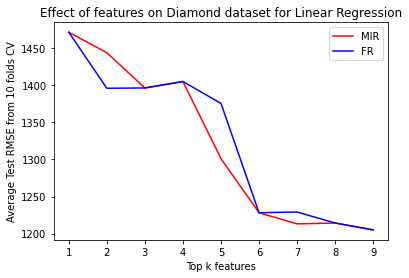

In [41]:
plt.plot(np.arange(1, len(RMSE_MIR) + 1, 1), np.negative(RMSE_MIR), color = 'r', label = 'MIR')
plt.plot(np.arange(1, len(RMSE_FR) + 1, 1), np.negative(RMSE_FR), color = 'b', label = 'FR')

plt.legend()
plt.xlabel('Top k features')
plt.ylabel('Average Test RMSE from 10 folds CV')
plt.title('Effect of features on Diamond dataset for Linear Regression')
plt.show()

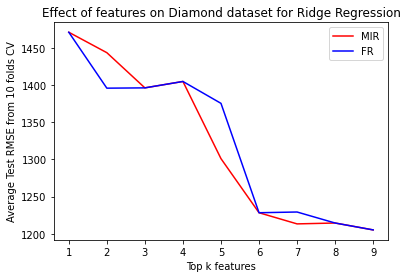

In [42]:
plt.plot(np.arange(1, len(RMSE_MIR_Ridge) + 1, 1), np.negative(RMSE_MIR_Ridge), color = 'r', label = 'MIR')
plt.plot(np.arange(1, len(RMSE_FR_Ridge) + 1, 1), np.negative(RMSE_FR_Ridge), color = 'b', label = 'FR')

plt.legend()
plt.xlabel('Top k features')
plt.ylabel('Average Test RMSE from 10 folds CV')
plt.title('Effect of features on Diamond dataset for Ridge Regression')
plt.show()

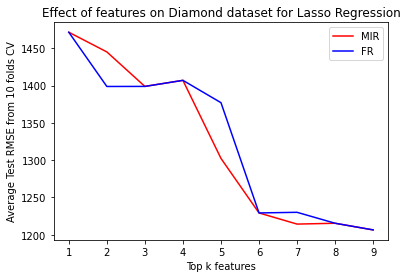

In [43]:
plt.plot(np.arange(1, len(RMSE_MIR_Lasso) + 1, 1), np.negative(RMSE_MIR_Lasso), color = 'r', label = 'MIR')
plt.plot(np.arange(1, len(RMSE_FR_Lasso) + 1, 1), np.negative(RMSE_FR_Lasso), color = 'b', label = 'FR')

plt.legend()
plt.xlabel('Top k features')
plt.ylabel('Average Test RMSE from 10 folds CV')
plt.title('Effect of features on Diamond dataset for Lasso Regression')
plt.show()

9 features with either MIR OR FR gives best RMSE

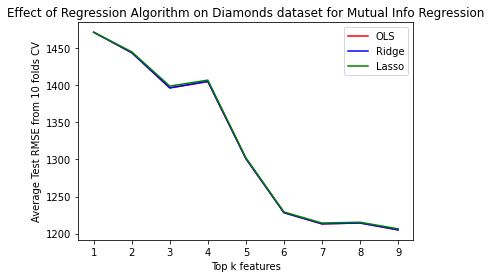

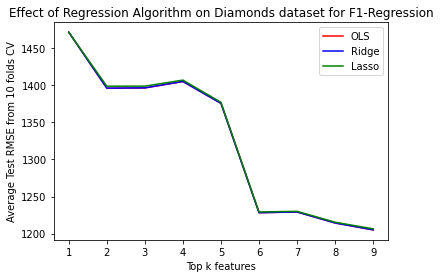

In [44]:
plt.plot(np.arange(1, len(RMSE_MIR) + 1, 1), np.negative(RMSE_MIR), color = 'r', label = 'OLS')
plt.plot(np.arange(1, len(RMSE_MIR_Ridge) + 1, 1), np.negative(RMSE_MIR_Ridge), color = 'b', label = 'Ridge')
plt.plot(np.arange(1, len(RMSE_MIR_Lasso) + 1, 1), np.negative(RMSE_MIR_Lasso), color = 'g', label = 'Lasso')

plt.legend()
plt.xlabel('Top k features')
plt.ylabel('Average Test RMSE from 10 folds CV')
plt.title('Effect of Regression Algorithm on Diamonds dataset for Mutual Info Regression')
plt.show()

plt.plot(np.arange(1, len(RMSE_FR) + 1, 1), np.negative(RMSE_FR), color = 'r', label = 'OLS')
plt.plot(np.arange(1, len(RMSE_FR_Ridge) + 1, 1), np.negative(RMSE_FR_Ridge), color = 'b', label = 'Ridge')
plt.plot(np.arange(1, len(RMSE_FR_Lasso) + 1, 1), np.negative(RMSE_FR_Lasso), color = 'g', label = 'Lasso')

plt.legend()
plt.xlabel('Top k features')
plt.ylabel('Average Test RMSE from 10 folds CV')
plt.title('Effect of Regression Algorithm on Diamonds dataset for F1-Regression')
plt.show()

### Standardized Price Results

In [45]:
RMSE_MIR = []
RMSE_FR = []

RMSE_MIR_Ridge = []
RMSE_FR_Ridge = []

RMSE_MIR_Lasso = []
RMSE_FR_Lasso = []

for i in range(1, X_df.shape[1] + 1):
    print('Testing Linear Regression, k = ', i)
    X_MIR = SelectKBest(score_func = mutual_info_regression, k = i).fit_transform(X_df, std_Y)
    X_FR = SelectKBest(score_func = f_regression, k = i).fit_transform(X_df, std_Y)
    
    diamond_out = cross_validate(LinearRegression(), X_MIR, std_Y, scoring = ['neg_root_mean_squared_error'], cv = 10)
    RMSE_MIR.append(diamond_out['test_neg_root_mean_squared_error'].mean())
    diamond_out = cross_validate(LinearRegression(), X_FR, std_Y, scoring = ['neg_root_mean_squared_error'], cv = 10)
    RMSE_FR.append(diamond_out['test_neg_root_mean_squared_error'].mean())
    
    print('Testing Ridge Regression, k = ', i)
    diamond_out = cross_validate(Ridge(), X_MIR, std_Y, scoring = ['neg_root_mean_squared_error'], cv = 10)
    RMSE_MIR_Ridge.append(diamond_out['test_neg_root_mean_squared_error'].mean())
    diamond_out = cross_validate(Ridge(), X_FR, std_Y, scoring = ['neg_root_mean_squared_error'], cv = 10)
    RMSE_FR_Ridge.append(diamond_out['test_neg_root_mean_squared_error'].mean())
    
    print('Testing Lasso Regression, k = ', i)
    diamond_out = cross_validate(Lasso(), X_MIR, std_Y, scoring = ['neg_root_mean_squared_error'], cv = 10)
    RMSE_MIR_Lasso.append(diamond_out['test_neg_root_mean_squared_error'].mean())
    diamond_out = cross_validate(Lasso(), X_FR, std_Y, scoring = ['neg_root_mean_squared_error'], cv = 10)
    RMSE_FR_Lasso.append(diamond_out['test_neg_root_mean_squared_error'].mean())


Testing Linear Regression, k =  1
Testing Ridge Regression, k =  1
Testing Lasso Regression, k =  1
Testing Linear Regression, k =  2
Testing Ridge Regression, k =  2
Testing Lasso Regression, k =  2
Testing Linear Regression, k =  3
Testing Ridge Regression, k =  3
Testing Lasso Regression, k =  3
Testing Linear Regression, k =  4
Testing Ridge Regression, k =  4
Testing Lasso Regression, k =  4
Testing Linear Regression, k =  5
Testing Ridge Regression, k =  5
Testing Lasso Regression, k =  5
Testing Linear Regression, k =  6
Testing Ridge Regression, k =  6
Testing Lasso Regression, k =  6
Testing Linear Regression, k =  7
Testing Ridge Regression, k =  7
Testing Lasso Regression, k =  7
Testing Linear Regression, k =  8
Testing Ridge Regression, k =  8
Testing Lasso Regression, k =  8
Testing Linear Regression, k =  9
Testing Ridge Regression, k =  9
Testing Lasso Regression, k =  9


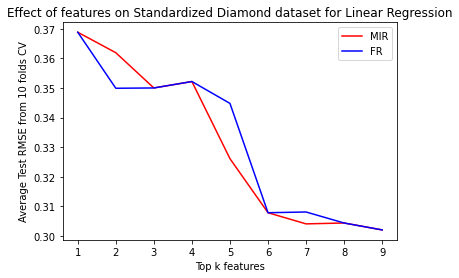

In [46]:
plt.plot(np.arange(1, len(RMSE_MIR) + 1, 1), np.negative(RMSE_MIR), color = 'r', label = 'MIR')
plt.plot(np.arange(1, len(RMSE_FR) + 1, 1), np.negative(RMSE_FR), color = 'b', label = 'FR')

plt.legend()
plt.xlabel('Top k features')
plt.ylabel('Average Test RMSE from 10 folds CV')
plt.title('Effect of features on Standardized Diamond dataset for Linear Regression')
plt.show()

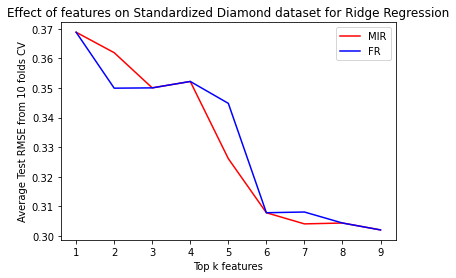

In [47]:
plt.plot(np.arange(1, len(RMSE_MIR_Ridge) + 1, 1), np.negative(RMSE_MIR_Ridge), color = 'r', label = 'MIR')
plt.plot(np.arange(1, len(RMSE_FR_Ridge) + 1, 1), np.negative(RMSE_FR_Ridge), color = 'b', label = 'FR')

plt.legend()
plt.xlabel('Top k features')
plt.ylabel('Average Test RMSE from 10 folds CV')
plt.title('Effect of features on Standardized Diamond dataset for Ridge Regression')
plt.show()

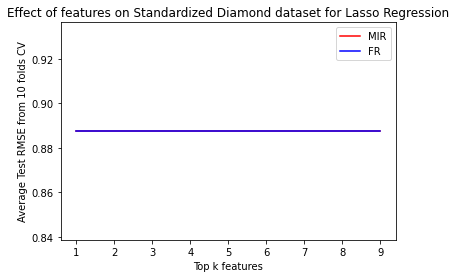

In [48]:
plt.plot(np.arange(1, len(RMSE_MIR_Lasso) + 1, 1), np.negative(RMSE_MIR_Lasso), color = 'r', label = 'MIR')
plt.plot(np.arange(1, len(RMSE_FR_Lasso) + 1, 1), np.negative(RMSE_FR_Lasso), color = 'b', label = 'FR')

plt.legend()
plt.xlabel('Top k features')
plt.ylabel('Average Test RMSE from 10 folds CV')
plt.title('Effect of features on Standardized Diamond dataset for Lasso Regression')
plt.show()

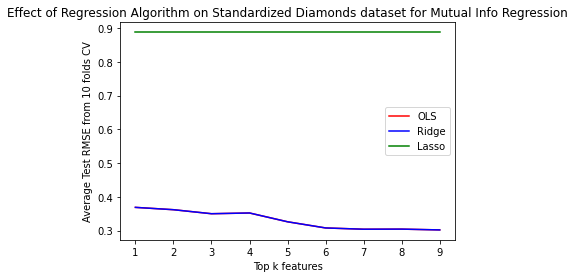

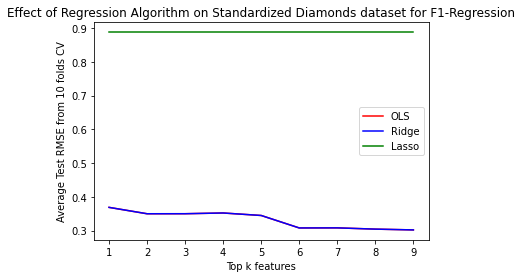

In [49]:
plt.plot(np.arange(1, len(RMSE_MIR) + 1, 1), np.negative(RMSE_MIR), color = 'r', label = 'OLS')
plt.plot(np.arange(1, len(RMSE_MIR_Ridge) + 1, 1), np.negative(RMSE_MIR_Ridge), color = 'b', label = 'Ridge')
plt.plot(np.arange(1, len(RMSE_MIR_Lasso) + 1, 1), np.negative(RMSE_MIR_Lasso), color = 'g', label = 'Lasso')

plt.legend()
plt.xlabel('Top k features')
plt.ylabel('Average Test RMSE from 10 folds CV')
plt.title('Effect of Regression Algorithm on Standardized Diamonds dataset for Mutual Info Regression')
plt.show()

plt.plot(np.arange(1, len(RMSE_FR) + 1, 1), np.negative(RMSE_FR), color = 'r', label = 'OLS')
plt.plot(np.arange(1, len(RMSE_FR_Ridge) + 1, 1), np.negative(RMSE_FR_Ridge), color = 'b', label = 'Ridge')
plt.plot(np.arange(1, len(RMSE_FR_Lasso) + 1, 1), np.negative(RMSE_FR_Lasso), color = 'g', label = 'Lasso')

plt.legend()
plt.xlabel('Top k features')
plt.ylabel('Average Test RMSE from 10 folds CV')
plt.title('Effect of Regression Algorithm on Standardized Diamonds dataset for F1-Regression')
plt.show()

In [50]:
## list two features for either dataset that has the lowest MI w.r.t to the target.
## Non Standardized 
selector = SelectKBest(score_func=mutual_info_regression, k=2)
X_new = selector.fit_transform(X_df,Y)
selected_features = X_df.columns[selector.get_support()]
print("The best two features are:", selected_features)
print("The mutual information scores are:", selector.scores_)

The best two features are: Index(['carat', 'y'], dtype='object')
The mutual information scores are: [0.05641884 0.13914246 0.21428844 1.64904294 1.41229912 1.42145034
 1.36088883 0.03120947 0.03647964]


In [51]:
## Standardized 
selector = SelectKBest(score_func=mutual_info_regression, k=2)
X_new = selector.fit_transform(X_df,std_Y)
selected_features = X_df.columns[selector.get_support()]
print("The best two features are:", selected_features)
print("The mutual information scores are:", selector.scores_)

The best two features are: Index(['carat', 'y'], dtype='object')
The mutual information scores are: [0.05526338 0.13762195 0.21536352 1.65060197 1.41180301 1.4219141
 1.3609958  0.03140935 0.03265564]


## Question 3 <br>
Explain what OOB error and R2
score means given this link

# Linear Regression

## Question 4.1 <br>
Explain how each regularization scheme affects the learned parameter set

## Question 4.2 <br>
Report your choice of the best regularization scheme along with the optimal penalty parameter and explain how you computed it.

In [52]:
from sklearn.pipeline import Pipeline, make_pipeline
from statsmodels.regression.linear_model import OLS

In [53]:
X_df = df[['cut_encoded','color_encoded','clarity_encoded','carat', 'x', 'y', 'z', 'depth', 'table']]
Y_df = df[['price']]
Y = df.price

std_X_df = standardized_df[['cut_encoded','color_encoded','clarity_encoded','carat', 'x', 'y', 'z', 'depth', 'table']]
std_Y_df = standardized_df[['price']]
std_Y = standardized_df.price

In [54]:
k_val = 9 # Inferred from the graph above 

#Unstandardized 
X_F = SelectKBest(score_func=f_regression, k=k_val).fit_transform(X_df, Y)
X_MIR = SelectKBest(score_func=mutual_info_regression, k=k_val).fit_transform(X_df,Y)

#Standardized 
X_FS = SelectKBest(score_func=f_regression, k=k_val).fit_transform(std_X_df,std_Y)
X_MIRS = SelectKBest(score_func=mutual_info_regression, k=k_val).fit_transform(std_X_df,std_Y)

Linear Regression

In [55]:
X_out_1 = cross_validate(LinearRegression(), X_F, std_Y, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1,return_train_score=True)
print('• No standardization, F1, linear regression: Test=',X_out_1['test_neg_root_mean_squared_error'].mean(),',Train=',X_out_1['train_neg_root_mean_squared_error'].mean())
X_out_2 = cross_validate(LinearRegression(), X_MIR, std_Y, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1,return_train_score=True)
print('• No standardization, MI, linear regression: Test=',X_out_2['test_neg_root_mean_squared_error'].mean(),',Train=',X_out_2['train_neg_root_mean_squared_error'].mean())
X_out_3 = cross_validate(LinearRegression(), X_FS, std_Y, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1,return_train_score=True)
print('• Standardization, F1, linear regression:  Test=',X_out_3['test_neg_root_mean_squared_error'].mean(),',Train=',X_out_3['train_neg_root_mean_squared_error'].mean())
X_out_4 = cross_validate(LinearRegression(), X_MIRS, std_Y, scoring=['neg_root_mean_squared_error'], cv=10,n_jobs=-1,return_train_score=True)
print('• Standardization, MI, linear regression: Test=',X_out_4['test_neg_root_mean_squared_error'].mean(),',Train=',X_out_4['train_neg_root_mean_squared_error'].mean())

• No standardization, F1, linear regression: Test= -1205.045050851018 ,Train= -1206.2805967946167
• No standardization, MI, linear regression: Test= -1205.045050851018 ,Train= -1206.2805967946167
• Standardization, F1, linear regression:  Test= -1205.0450508509552 ,Train= -1206.2805967946167
• Standardization, MI, linear regression: Test= -1205.0450508509552 ,Train= -1206.2805967946167


Ridge Regression

In [56]:
pipe_Ridge = Pipeline([('model', Ridge(random_state=42))])
param_grid = {
    'model__alpha': (0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0)
}

In [57]:
grid_Ridge_F = GridSearchCV(pipe_Ridge, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(X_F, std_Y)
grid_Ridge_FS = GridSearchCV(pipe_Ridge, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(X_FS, std_Y)
grid_Ridge_M = GridSearchCV(pipe_Ridge, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(X_MIR, std_Y)
grid_Ridge_MS = GridSearchCV(pipe_Ridge, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(X_MIRS, std_Y)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits


In [58]:
print('No standardization, F1, ridge reg., Test RMSE:',grid_Ridge_F.best_score_,
      ',alpha:',grid_Ridge_F.best_params_,'train RMSE',max(grid_Ridge_F.cv_results_['mean_train_score']))
print('Standardization, F1, ridge reg., Test RMSE:',grid_Ridge_FS.best_score_,
      ',alpha:',grid_Ridge_FS.best_params_,'train RMSE',max(grid_Ridge_FS.cv_results_['mean_train_score']))
print('No standardization, MI, ridge reg., Test RMSE:',grid_Ridge_M.best_score_,
      ',alpha:',grid_Ridge_M.best_params_,'train RMSE',max(grid_Ridge_M.cv_results_['mean_train_score']))
print('Standardization, MI, ridge reg., Test RMSE:',grid_Ridge_MS.best_score_,
      ',alpha:',grid_Ridge_MS.best_params_,'train RMSE',max(grid_Ridge_MS.cv_results_['mean_train_score']))

No standardization, F1, ridge reg., Test RMSE: -1205.0450879077973 ,alpha: {'model__alpha': 0.0001} train RMSE -1206.2805967946392
Standardization, F1, ridge reg., Test RMSE: -1205.0450594357058 ,alpha: {'model__alpha': 0.0001} train RMSE -1206.2805967946183
No standardization, MI, ridge reg., Test RMSE: -1205.0450879077973 ,alpha: {'model__alpha': 0.0001} train RMSE -1206.2805967946392
Standardization, MI, ridge reg., Test RMSE: -1205.0450594357058 ,alpha: {'model__alpha': 0.0001} train RMSE -1206.2805967946183


Lasso Regression

In [59]:
pipe_Lasso = Pipeline([('model', Lasso(random_state=42))])
param_grid = {
    'model__alpha': (0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0)
}

In [60]:
grid_Lasso_F = GridSearchCV(pipe_Lasso, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(X_F,std_Y)
grid_Lasso_FS = GridSearchCV(pipe_Lasso, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(X_FS, std_Y)
grid_Lasso_M = GridSearchCV(pipe_Lasso, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(X_MIR, std_Y)
grid_Lasso_MS = GridSearchCV(pipe_Lasso, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, 
                     scoring='neg_root_mean_squared_error', return_train_score=True).fit(X_MIRS, std_Y)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits


In [61]:
print('No standardization, F1, Lasso reg., Test RMSE:',grid_Lasso_F.best_score_,
      ',alpha:',grid_Lasso_F.best_params_,'train RMSE',max(grid_Lasso_F.cv_results_['mean_train_score']))
print('Standardization, F1, Lasso reg., Test RMSE:',grid_Lasso_FS.best_score_,
      ',alpha:',grid_Lasso_FS.best_params_,'train RMSE',max(grid_Lasso_FS.cv_results_['mean_train_score']))
print('No standardization, MI, Lasso reg., Test RMSE:',grid_Lasso_M.best_score_,
      ',alpha:',grid_Lasso_M.best_params_,'train RMSE',max(grid_Lasso_M.cv_results_['mean_train_score']))
print('Standardization, MI, Lasso reg., Test RMSE:',grid_Lasso_MS.best_score_,
      ',alpha:',grid_Lasso_MS.best_params_,'train RMSE',max(grid_Lasso_MS.cv_results_['mean_train_score']))

No standardization, F1, Lasso reg., Test RMSE: -1205.0452386055197 ,alpha: {'model__alpha': 0.0001} train RMSE -1206.2805967957875
Standardization, F1, Lasso reg., Test RMSE: -1205.0451378935275 ,alpha: {'model__alpha': 0.0001} train RMSE -1206.2805967953695
No standardization, MI, Lasso reg., Test RMSE: -1205.0452386055197 ,alpha: {'model__alpha': 0.0001} train RMSE -1206.2805967957875
Standardization, MI, Lasso reg., Test RMSE: -1205.0451378935275 ,alpha: {'model__alpha': 0.0001} train RMSE -1206.2805967953695


In [62]:
## Best Obtained is Linear Regression
#-1205.0451378935275 - Lasso
#-1205.0450594357058 - Ridge
#-1205.0450508509552  - Linear Regression

## Question 4.3 <br>
Does feature standardization play a role in improving the model performance (in the cases with ridge regularization)? Justify your answer.

In [63]:
## Slight Improvement

## Question 4.4
Some linear regression packages return p-values for different features. What is the meaning of these p-values and how can you infer the most significant features?

In [64]:
import statsmodels.api as sm
 
lm_fit = sm.OLS(std_Y, sm.add_constant(std_X_df)).fit()
print(lm_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 5.845e+04
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        01:09:50   Log-Likelihood:            -4.5972e+05
No. Observations:               53940   AIC:                         9.195e+05
Df Residuals:                   53930   BIC:                         9.195e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3934.8016      5.239    7

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [65]:
lm_fit.pvalues

const               0.000000e+00
cut_encoded         1.113990e-98
color_encoded       0.000000e+00
clarity_encoded     0.000000e+00
carat               0.000000e+00
x                  3.098309e-136
y                   3.501855e-02
z                   4.158692e-01
depth               4.663890e-62
table               1.130952e-19
dtype: float64

In [66]:
## Explaining P-Values

# Polynomial Regression

## Question 5.1 <br>
What are the most salient features? Why?

In [90]:
from sklearn.preprocessing import PolynomialFeatures

In [91]:
# Best previously was top 9 with F-Regression
pipeline = Pipeline([('PR', PolynomialFeatures()),('standardize', StandardScaler()),('model', Ridge(random_state=42))])

param_grid = [{'PR__degree': (1, 2, 3, 4, 5, 6),'model__alpha': (0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0)}]

grid = GridSearchCV(pipeline, param_grid = param_grid, cv = 10, verbose = 3, n_jobs=6,
                     scoring = 'neg_root_mean_squared_error', return_train_score = True).fit(X_FS, std_Y)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


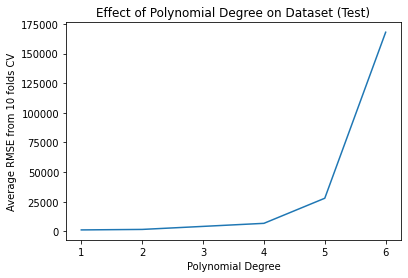

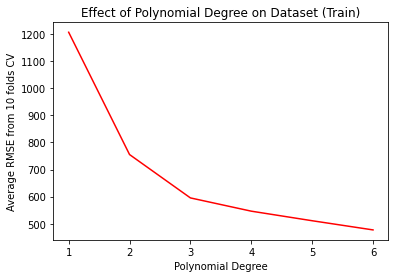

In [92]:
poly_result = pd.DataFrame(grid.cv_results_)[['mean_test_score','mean_train_score','param_PR__degree','param_model__alpha']]
results = poly_result.sort_values(by=['mean_test_score'], ascending = False).reset_index(drop = True)
results.to_csv('diamond_PR.csv', sep='\t', encoding='utf-8')
score = []
train = []
alpha = []
degree_list = np.arange(1,7,1)

for i in degree_list:
    score.append((poly_result.loc[poly_result['param_PR__degree'] == i]).max().mean_test_score)
    train.append((poly_result.loc[poly_result['param_PR__degree'] == i]).max().mean_train_score)
    alpha.append(float(poly_result['param_model__alpha'][
        (poly_result.loc[poly_result['param_PR__degree'] == i])
        [['mean_test_score']].idxmax()].to_numpy()))

plt.plot(degree_list, np.negative(score))
plt.xlabel('Polynomial Degree')
plt.ylabel('Average RMSE from 10 folds CV')
plt.title('Effect of Polynomial Degree on Dataset (Test)')
plt.show()

plt.plot(degree_list, np.negative(train), 'r')
plt.xlabel('Polynomial Degree')
plt.ylabel('Average RMSE from 10 folds CV')
plt.title('Effect of Polynomial Degree on Dataset (Train)')
plt.show()

In [93]:
chY = SelectKBest(score_func=f_regression, k=9)
XTranscode_Test = chY.fit_transform(std_X_df, standardized_df.price)
column_names = std_X_df.columns[chY.get_support()]

b_params = grid.best_estimator_.get_params()
b_coefs = b_params['model'].coef_
b_feature_name = list(column_names)
b_names = b_params['PR'].get_feature_names_out(b_feature_name)
b_sorted_indice = np.argsort(-abs(b_coefs))
salient_features =[b_names[i] for i in b_sorted_indice[:5]]
print ('Top 5 Salient features:',salient_features)

Top 5 Salient features: ['carat', 'x', 'clarity_encoded', 'color_encoded', 'cut_encoded']


## Question 5.2 <br>
What degree of polynomial is best? How did you find the optimal degree? What does a very high-order polynomial imply about the fit on the training data? What about its performance on testing data? 

In [77]:
## 1 is best
## best testing error
## overfit
## not generalizing well

# Neural Network

## Question 6.1 <br>
Adjust your network size (number of hidden neurons and depth), and weight decay as regularization. Find a good hyper-parameter set systematically (no more than 20 experiments in total)


In [67]:
from sklearn.neural_network import MLPRegressor
import itertools

In [69]:
a_list = [10,100]
all_combinations = []

for r in range(len(a_list) + 1):
    combinations_object = itertools.combinations_with_replacement(a_list, r)
    combinations_list = list(combinations_object)
    all_combinations += combinations_list
all_combinations = all_combinations[1:]

pipeline = Pipeline([('model', MLPRegressor(random_state=42))
])
                         
param_grid = {
    'model__hidden_layer_sizes': all_combinations,
    'model__alpha': [0.001,0.1,10],
    'model__activation': ['tanh', 'relu']
}

grid = GridSearchCV(pipeline, param_grid = param_grid, cv = 10, verbose = 3,n_jobs=6,
                     scoring = 'neg_root_mean_squared_error', return_train_score = True).fit(std_X_df, std_Y)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


C:\Users\Tazeem Khan\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [70]:
results_nn = pd.DataFrame(grid.cv_results_)[['mean_test_score', 'mean_train_score', 'param_model__hidden_layer_sizes', 'param_model__alpha', 'param_model__activation']]
result_nn = results_nn.sort_values(by=['mean_test_score'], ascending = False).reset_index(drop = True)
result_nn.to_csv('diamondsNN.csv', sep='\t', encoding='utf-8')
print('Best parameters:',grid.best_params_,',Test RMSE:',grid.best_score_)
print('Train RMSE:',max(result_nn.mean_train_score))

Best parameters: {'model__activation': 'relu', 'model__alpha': 10, 'model__hidden_layer_sizes': (100, 100)} ,Test RMSE: -622.6319133312167
Train RMSE: -548.3416401412477


## Question 6.2 <br>
How does the performance generally compare with linear regression? Why?

Best Lasso Regression =  -1205.0451378935275 <br>
Best Ridge Regression =  -1205.0450594357058 <br>
Best Linear Regression = -1205.0450508509552 <br>
Best Neural Network   =  -0.1401297029892888

In [71]:
## Please explain

## Question 6.3 <br>
What activation function did you use for the output and why? You may use none.

No output activation required for linear regression output

In [72]:
## Explain further

## Question 6.4 <br>
What is the risk of increasing the depth of the network too far?

In [73]:
## Explain further

# Random Forest

## Question 7.1 <br>
Explain how <br>
<br>
 – Maximum number of features; <br>
 – Number of trees; <br> 
 – Depth of each tree; <br>
 
 hyper-parameters affect the overall performance. Describe if and how each hyper-parameter results in a regularization effect during training.

In [100]:
from sklearn.ensemble import RandomForestRegressor

In [101]:
pipeline = Pipeline([('model', RandomForestRegressor(random_state = 42, oob_score = True))])
                         
param_grid = {'model__max_features': np.arange(1, 8, 1),'model__n_estimators': np.arange(10, 100, 10),'model__max_depth': np.arange(1, 10, 1)}

grid = GridSearchCV(pipeline, param_grid = param_grid, cv = 10, n_jobs = 8, verbose = 3, 
                     scoring = 'neg_root_mean_squared_error', return_train_score = True).fit(std_X_df, std_Y)

Fitting 10 folds for each of 567 candidates, totalling 5670 fits


In [102]:
results_RF = pd.DataFrame(grid.cv_results_)[['mean_test_score', 'mean_train_score', 'param_model__max_features', 'param_model__n_estimators', 'param_model__max_depth']]
result_RF = results_RF.sort_values(by=['mean_test_score'], ascending = False).reset_index(drop = True)
result_RF.to_csv('diamondsRF.csv', sep='\t', encoding='utf-8')
print('Best parameters:',grid.best_params_,',Test RMSE:',grid.best_score_)
print('Train RMSE:',max(result_RF.mean_train_score))


Best parameters: {'model__max_depth': 9, 'model__max_features': 7, 'model__n_estimators': 90} ,Test RMSE: -806.4297888315721
Train RMSE: -523.5703583203795


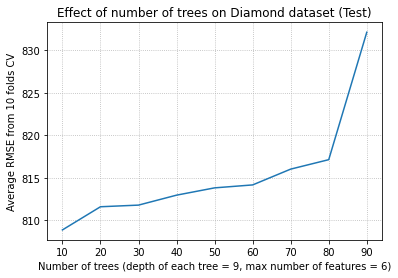

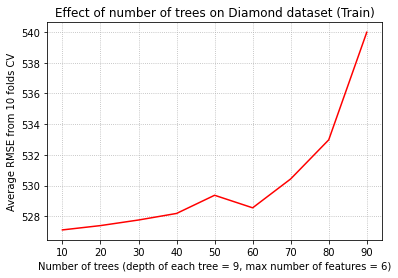

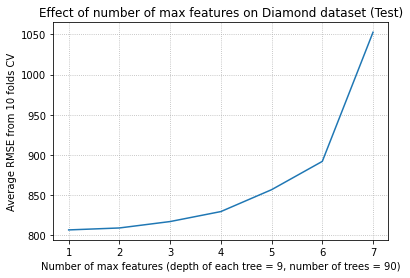

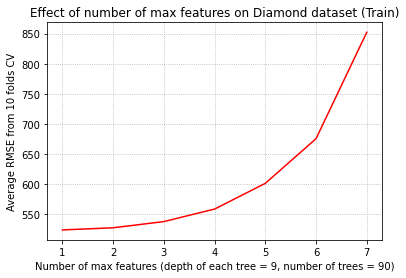

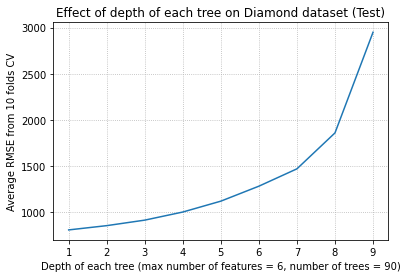

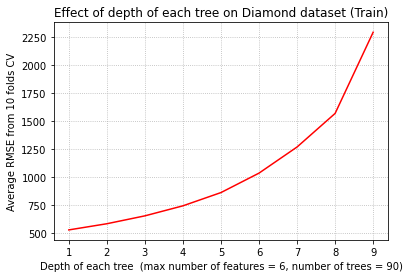

In [103]:
max_features = np.arange(1, 8, 1).reshape(7)
n_estimators = np.arange(10, 100, 10).reshape(9)
max_depth = np.arange(1, 10, 1).reshape(9)

score = np.negative(list((result_RF[(result_RF['param_model__max_depth'] == 9) & (result_RF['param_model__max_features'] == 6)]).mean_test_score))
train = np.negative(list((result_RF[(result_RF['param_model__max_depth'] == 9) & (result_RF['param_model__max_features'] == 6)]).mean_train_score))
plt.plot(n_estimators, score)
plt.grid(linestyle=':')
plt.xlabel('Number of trees (depth of each tree = 9, max number of features = 6)')
plt.ylabel('Average RMSE from 10 folds CV')
plt.title('Effect of number of trees on Diamond dataset (Test)')
plt.show()

plt.plot(n_estimators, train, 'r')
plt.grid(linestyle=':')
plt.xlabel('Number of trees (depth of each tree = 9, max number of features = 6)')
plt.ylabel('Average RMSE from 10 folds CV')
plt.title('Effect of number of trees on Diamond dataset (Train)')
plt.show()

score = np.negative(list((result_RF[(result_RF['param_model__max_depth'] == 9) & (result_RF['param_model__n_estimators'] == 90)]).mean_test_score))
train = np.negative(list((result_RF[(result_RF['param_model__max_depth'] == 9) & (result_RF['param_model__n_estimators'] == 90)]).mean_train_score))
plt.plot(max_features, score)
plt.grid(linestyle=':')
plt.xlabel('Number of max features (depth of each tree = 9, number of trees = 90)')
plt.ylabel('Average RMSE from 10 folds CV')
plt.title('Effect of number of max features on Diamond dataset (Test)')
plt.show()

plt.plot(max_features, train, 'r')
plt.grid(linestyle=':')
plt.xlabel('Number of max features (depth of each tree = 9, number of trees = 90)')
plt.ylabel('Average RMSE from 10 folds CV')
plt.title('Effect of number of max features on Diamond dataset (Train)')
plt.show()

score = np.negative(list((result_RF[(result_RF['param_model__max_features'] == 6) & (result_RF['param_model__n_estimators'] == 90)]).mean_test_score))
train = np.negative(list((result_RF[(result_RF['param_model__max_features'] == 6) & (result_RF['param_model__n_estimators'] == 90)]).mean_train_score))
plt.plot(max_depth, score)
plt.grid(linestyle=':')
plt.xlabel('Depth of each tree (max number of features = 6, number of trees = 90)')
plt.ylabel('Average RMSE from 10 folds CV')
plt.title('Effect of depth of each tree on Diamond dataset (Test)')
plt.show()

plt.plot(max_depth, train, 'r')
plt.grid(linestyle=':')
plt.xlabel('Depth of each tree  (max number of features = 6, number of trees = 90)')
plt.ylabel('Average RMSE from 10 folds CV')
plt.title('Effect of depth of each tree on Diamond dataset (Train)')
plt.show()

## Question 7.2 <br>
How do random forests create a highly non-linear decision boundary despite the fact
that all we do at each layer is apply a threshold on a feature?

In [104]:
## Explain

## Question 7.3 <br>
Randomly pick a tree in your random forest model (with maximum depth of 4) and
plot its structure. Which feature is selected for branching at the root node? What
can you infer about the importance of this feature as opposed to others? Do the
important features correspond to what you got in part 3.3.1? 

In [105]:
vis_tree = RandomForestRegressor(random_state=42,max_depth=4,
                                max_features=6, n_estimators=90, 
                                oob_score=True).fit(std_X_df, std_Y)

In [106]:
# !pip install pydot

In [107]:
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image

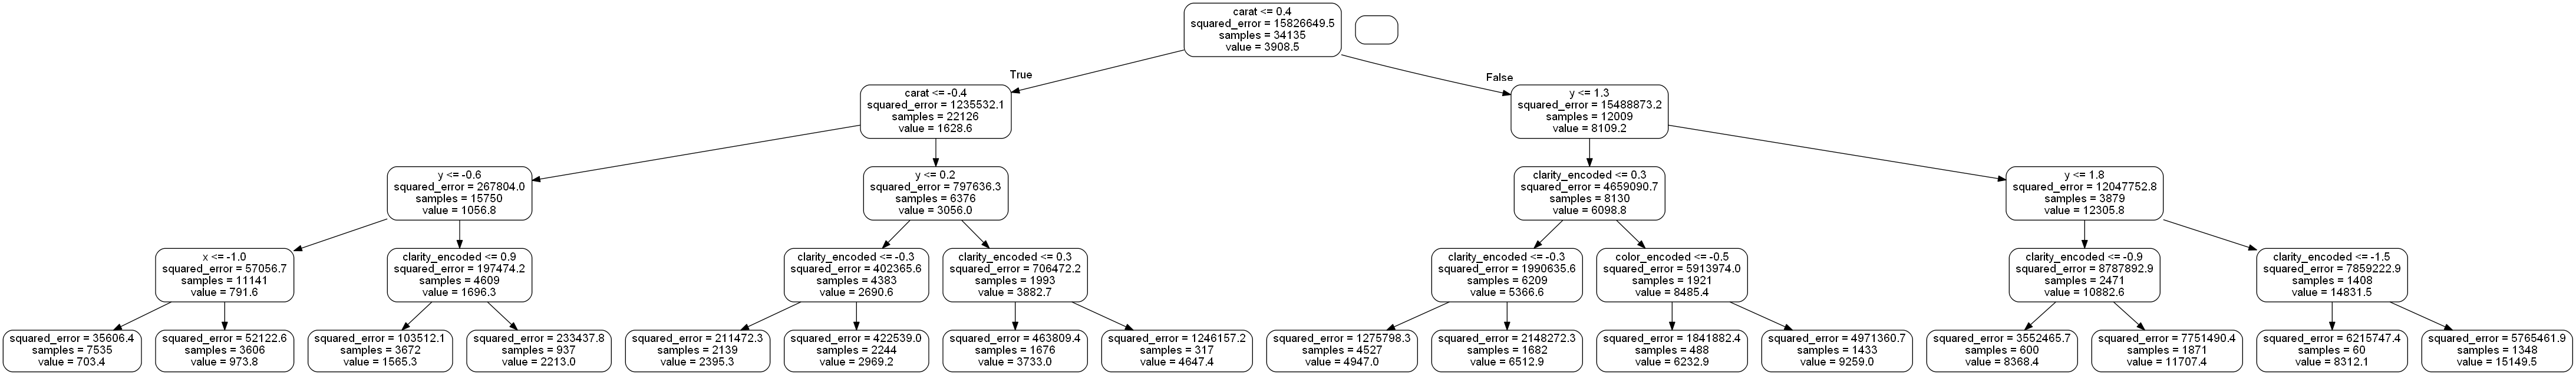

In [108]:
tree = vis_tree.estimators_[1]
export_graphviz(tree, out_file = 'tree.dot', feature_names = column_names, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
Image(graph.create_png())

In [109]:
## Explain Above Chart

## Question 7.4 <br>
Measure “Out-of-Bag Error” (OOB). Explain what OOB error and R2 score means.

In [110]:
grid.best_estimator_['model'].oob_score_

0.9784945892811334

#  LightGBM, CatBoost and Bayesian Optimization

## Question 8.1 <br>
Read the documentation of LightGBM OR CatBoost and determine the important
hyperparameters along with a search space for the tuning of these parameters (keep
the search space small).

In [111]:
## Write Important Hyperparameter

In [112]:
# !pip install scikit-optimize

## Question 8.2 <br>
Apply Bayesian optimization using skopt.BayesSearchCV from scikit-optmize
to find the ideal hyperparameter combination in your search space. Report the best
hyperparameter set found and the corresponding RMSE.

In [113]:
from skopt import BayesSearchCV
import lightgbm as lgb

In [114]:
opt = BayesSearchCV(lgb.LGBMRegressor(random_state = 42, verbose = 1, n_jobs = 8),
    { 'num_leaves': np.arange(1, 3000, 100),'min_data_in_leaf' : np.arange(1, 1000, 100), #Hyperparameters that control the tree structure
     'max_depth': np.arange(1, 100, 10),'n_estimators': np.arange(10, 4000, 100),
     'reg_alpha': [10.0**x for x in np.arange(-3, 3)],'reg_lambda': [10.0**x for x in np.arange(-3, 3)],'subsample': np.arange(0.1, 1, 0.1),
     'subsample_freq': np.arange(0, 100, 10),'min_split_gain': [10.0**x for x in np.arange(-3, 0)],'bagging_fraction' : [0.4, 0.6, 0.8],
     "bagging_freq" : [1, 2],"bagging_seed" : [42],
     'boosting_type': ['gbdt', 'dart', 'rf'],},
    n_iter = 10,cv = 10,n_jobs = 8,verbose = 3,random_state = 42,scoring = 'neg_root_mean_squared_error',return_train_score = True)

grid = opt.fit(std_X_df, std_Y)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
[LightGBM] [Warning] min_data_in_leaf is set=301, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=301
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=0.6 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] min_data_in_leaf is 

In [115]:
grid.cv_results_['param_min_data_in_leaf'].data

array([401, 101, 401, 101, 601, 301, 501, 1, 201, 201], dtype=object)

In [116]:
result_LGBM = pd.DataFrame(grid.cv_results_)[['mean_test_score','mean_train_score','param_boosting_type','param_num_leaves','param_max_depth','param_n_estimators',
             'param_reg_alpha','param_reg_lambda','param_subsample','param_subsample_freq','param_bagging_fraction','param_bagging_freq','param_min_data_in_leaf',
              'param_min_split_gain']]
results_LGBM = result_LGBM.sort_values(by=['mean_test_score'], ascending = False).reset_index(drop = True)
results_LGBM.to_csv('diamonds_lgbm.csv', sep='\t', encoding='utf-8')
print('Best parameters (diamonds):',opt.best_params_,',Test RMSE:',opt.best_score_)
print('Train RMSE:',min(opt.cv_results_['mean_train_score']))

Best parameters (diamonds): OrderedDict([('bagging_fraction', 0.6), ('bagging_freq', 2), ('bagging_seed', 42), ('boosting_type', 'dart'), ('max_depth', 71), ('min_data_in_leaf', 301), ('min_split_gain', 0.01), ('n_estimators', 2110), ('num_leaves', 2301), ('reg_alpha', 1.0), ('reg_lambda', 1.0), ('subsample', 0.6), ('subsample_freq', 0)]) ,Test RMSE: -587.279550020244
Train RMSE: -1265.9609299464526


In [117]:
results_LGBM

,mean_test_score,mean_train_score,param_boosting_type,param_num_leaves,param_max_depth,param_n_estimators,param_reg_alpha,param_reg_lambda,param_subsample,param_subsample_freq,param_bagging_fraction,param_bagging_freq,param_min_data_in_leaf,param_min_split_gain
0,-587.279550,-481.436866,dart,2301,71,2110,1.0,1.0,0.6,0,0.6,2,301,0.01
1,-602.259912,-393.834249,gbdt,1701,31,1410,0.01,10.0,0.5,10,0.8,2,201,0.001
2,-603.629489,-499.249012,gbdt,2601,51,610,10.0,10.0,0.1,20,0.4,2,201,0.01
3,-609.218378,-476.747092,gbdt,1601,21,2910,100.0,10.0,0.4,20,0.6,2,401,0.001
4,-609.592765,-475.639951,gbdt,901,61,2910,1.0,1.0,0.2,20,0.6,2,401,0.01
5,-643.383115,-534.462088,gbdt,1001,81,2510,1.0,1.0,0.8,20,0.8,1,601,0.01
6,-798.558392,-442.066426,rf,1101,31,110,10.0,0.1,0.6,60,0.6,2,1,0.01
7,-893.464982,-723.815155,rf,2601,51,3410,0.1,0.1,0.8,50,0.8,1,101,0.1
8,-915.197533,-741.230163,rf,1801,81,1410,100.0,1.0,0.9,70,0.8,2,101,0.001
9,-1450.415695,-1265.960930,rf,2101,51,1610,1.0,100.0,0.6,60,0.6,2,501,0.01


## Question 8.3 <br>
Qualitatively interpret the effect of the hyperparameters using the Bayesian optimization results: Which of them helps with performance? Which helps with regularization? Which affects the fitting efficiency?


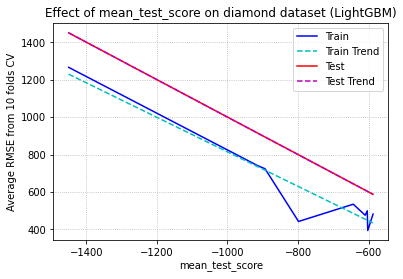

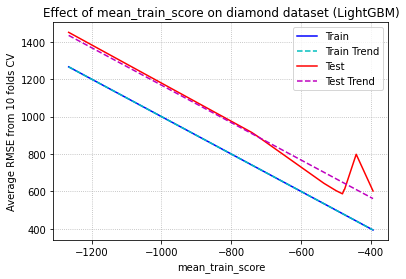

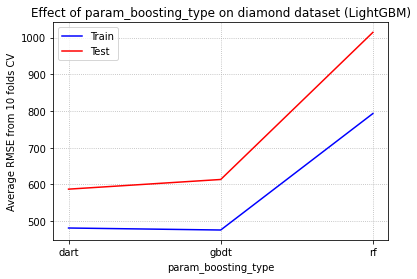

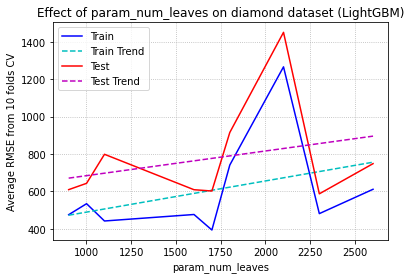

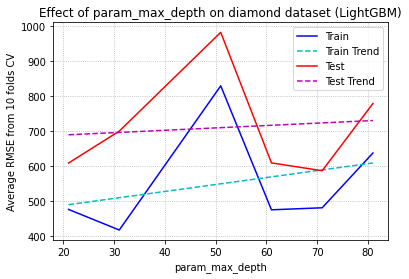

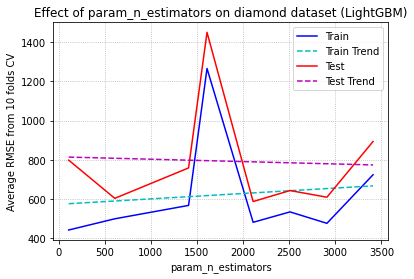

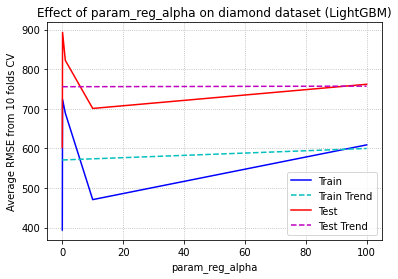

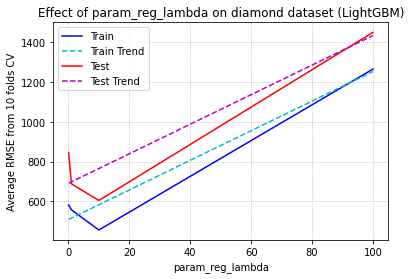

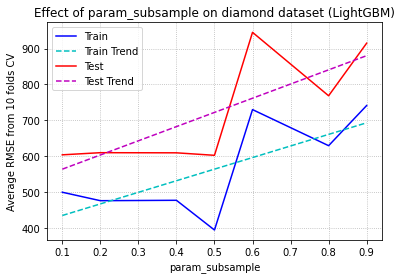

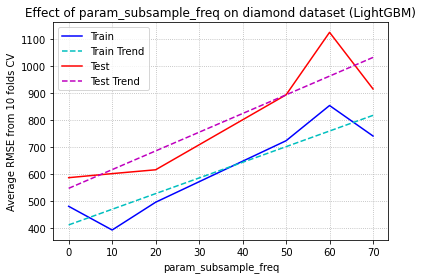

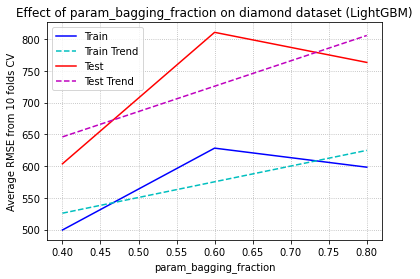

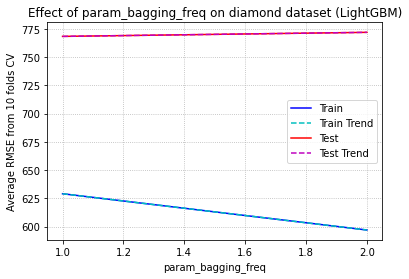

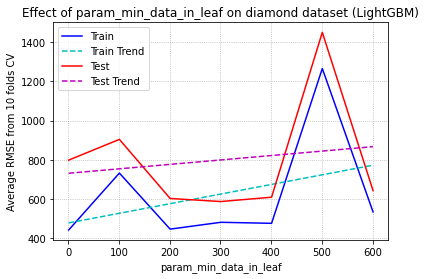

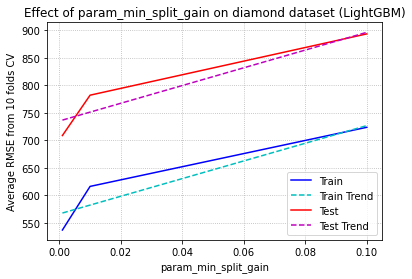

In [118]:
param_list = ['mean_test_score','mean_train_score','param_boosting_type','param_num_leaves','param_max_depth','param_n_estimators',
             'param_reg_alpha','param_reg_lambda','param_subsample','param_subsample_freq','param_bagging_fraction','param_bagging_freq','param_min_data_in_leaf',
              'param_min_split_gain']
for param in param_list:
    param_set = sorted(list(set(opt.cv_results_[param])))
    param_trainscore = []
    param_testscore = []

    for item in param_set:
        param_trainscore.append(np.mean([opt.cv_results_['mean_train_score'][k] 
                                    for k in [i for i, x in enumerate(opt.cv_results_[param]) 
                                              if x == item]])) 
        param_testscore.append(np.mean([opt.cv_results_['mean_test_score'][k] 
                                    for k in [i for i, x in enumerate(opt.cv_results_[param]) 
                                              if x == item]])) 

    param_trainscore = np.negative(param_trainscore)    
    param_testscore = np.negative(param_testscore)   
    
    plt.plot(param_set, param_trainscore, label="Train", color='b')
    if(type(param_set[0]).__name__ != 'str'):
        plt.plot(param_set, np.poly1d(np.polyfit(param_set, param_trainscore,1))(param_set),'--',label="Train Trend",color='c')
    plt.plot(param_set,param_testscore,label="Test",color='r')
    if(type(param_set[0]).__name__ != 'str'):
        plt.plot(param_set, np.poly1d(np.polyfit(param_set, param_testscore,1))(param_set),'--',label="Test Trend",color='m')
    
    plt.legend()
    plt.grid(linestyle=':')
    plt.xlabel(param)
    plt.ylabel('Average RMSE from 10 folds CV')
    plt.title("Effect of %s on diamond dataset (LightGBM)" % param)
    plt.show()